In [2]:
!pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 57.0 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 94.3 MB/s  0:00:00
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=09ebf96e9e21fad8734a71ce5443ff4800dff222255f61e1f784182c0a852f46
  Stored in directory: /home/sagemaker-

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


# SECTION 1: DATA COLLECTION

In [8]:
# Define stocks to analyze
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

print(f"\nDownloading data for {len(tickers)} stocks...")
print(f"Period: {start_date} to {end_date}")

# Download data
data = yf.download(tickers, start="2023-01-01", end="2025-10-10", group_by='ticker')
print(data.head())

print(f"\n✓ Data downloaded successfully!")
print(f"Shape: {data.shape}")
print(f"Date range: {data.index[0]} to {data.index[-1]}")
print(f"Total trading days: {len(data)}")

[*********************100%***********************]  5 of 5 completed


Period: 2020-01-01 to 2024-10-01
Ticker            AAPL                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2023-01-03  128.468178  129.079551  122.443150  123.330635  112117500   
2023-01-04  125.125320  126.870708  123.340494  124.602692   89113600   
2023-01-05  125.361991  125.993089  123.024955  123.281334   80962700   
2023-01-06  124.257557  128.478025  123.153130  127.817345   87754700   
2023-01-09  128.655538  131.554653  128.083602  128.339981   70790800   

Ticker          GOOGL                                             ...  \
Price            Open       High        Low      Close    Volume  ...   
Date                                                              ...   
2023-01-03  88.976319  90.426324  87.913648  88.509544  28131200  ...   
2023-01-04  89.731117  90.029065  86.672213  87.476669  34854800  ...   
2023-01-05  86.8

# SECTION 2: DATA OVERVIEW

In [9]:
import pandas as pd
import yfinance as yf

tickers = ["AAPL", "GOOGL", "MSFT"]

# Download data for multiple tickers, auto_adjust=True gives adjusted close
data = yf.download(tickers, start="2023-01-01", end="2025-10-10", group_by='ticker', auto_adjust=True)

print("\n" + "="*70)
print("DATA OVERVIEW")
print("="*70)

# Check for missing values
print("\nMissing values per ticker:")
for ticker in tickers:
    missing = data[ticker]['Close'].isnull().sum()
    total = len(data[ticker])
    print(f"{ticker}: {missing} ({missing/total*100:.2f}%)")

# Basic statistics for each stock
print("\n" + "-"*70)
print("CLOSE PRICE STATISTICS")
print("-"*70)

stats_df = pd.DataFrame()

for ticker in tickers:
    df = data[ticker]
    stats = {
        'Ticker': ticker,
        'Mean': df['Close'].mean(),
        'Median': df['Close'].median(),
        'Std': df['Close'].std(),
        'Min': df['Close'].min(),
        'Max': df['Close'].max(),
        'Start_Price': df['Close'].iloc[0],
        'End_Price': df['Close'].iloc[-1],
        'Total_Return (%)': ((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100
    }
    stats_df = pd.concat([stats_df, pd.DataFrame([stats])], ignore_index=True)

print(stats_df.to_string(index=False))



[*********************100%***********************]  3 of 3 completed


DATA OVERVIEW

Missing values per ticker:
AAPL: 0 (0.00%)
GOOGL: 0 (0.00%)
MSFT: 0 (0.00%)

----------------------------------------------------------------------
CLOSE PRICE STATISTICS
----------------------------------------------------------------------
Ticker       Mean     Median       Std        Min        Max  Start_Price  End_Price  Total_Return (%)
  AAPL 197.405969 192.907883 29.582383 123.281334 258.103729   123.330635 254.039993        105.982879
 GOOGL 153.434520 155.981491 34.565636  85.609535 254.720001    88.509544 241.529999        172.885823
  MSFT 387.921502 403.052185 72.407196 217.525269 534.760925   234.423584 522.400024        122.844483


# SECTION 3: VISUALIZATIONS

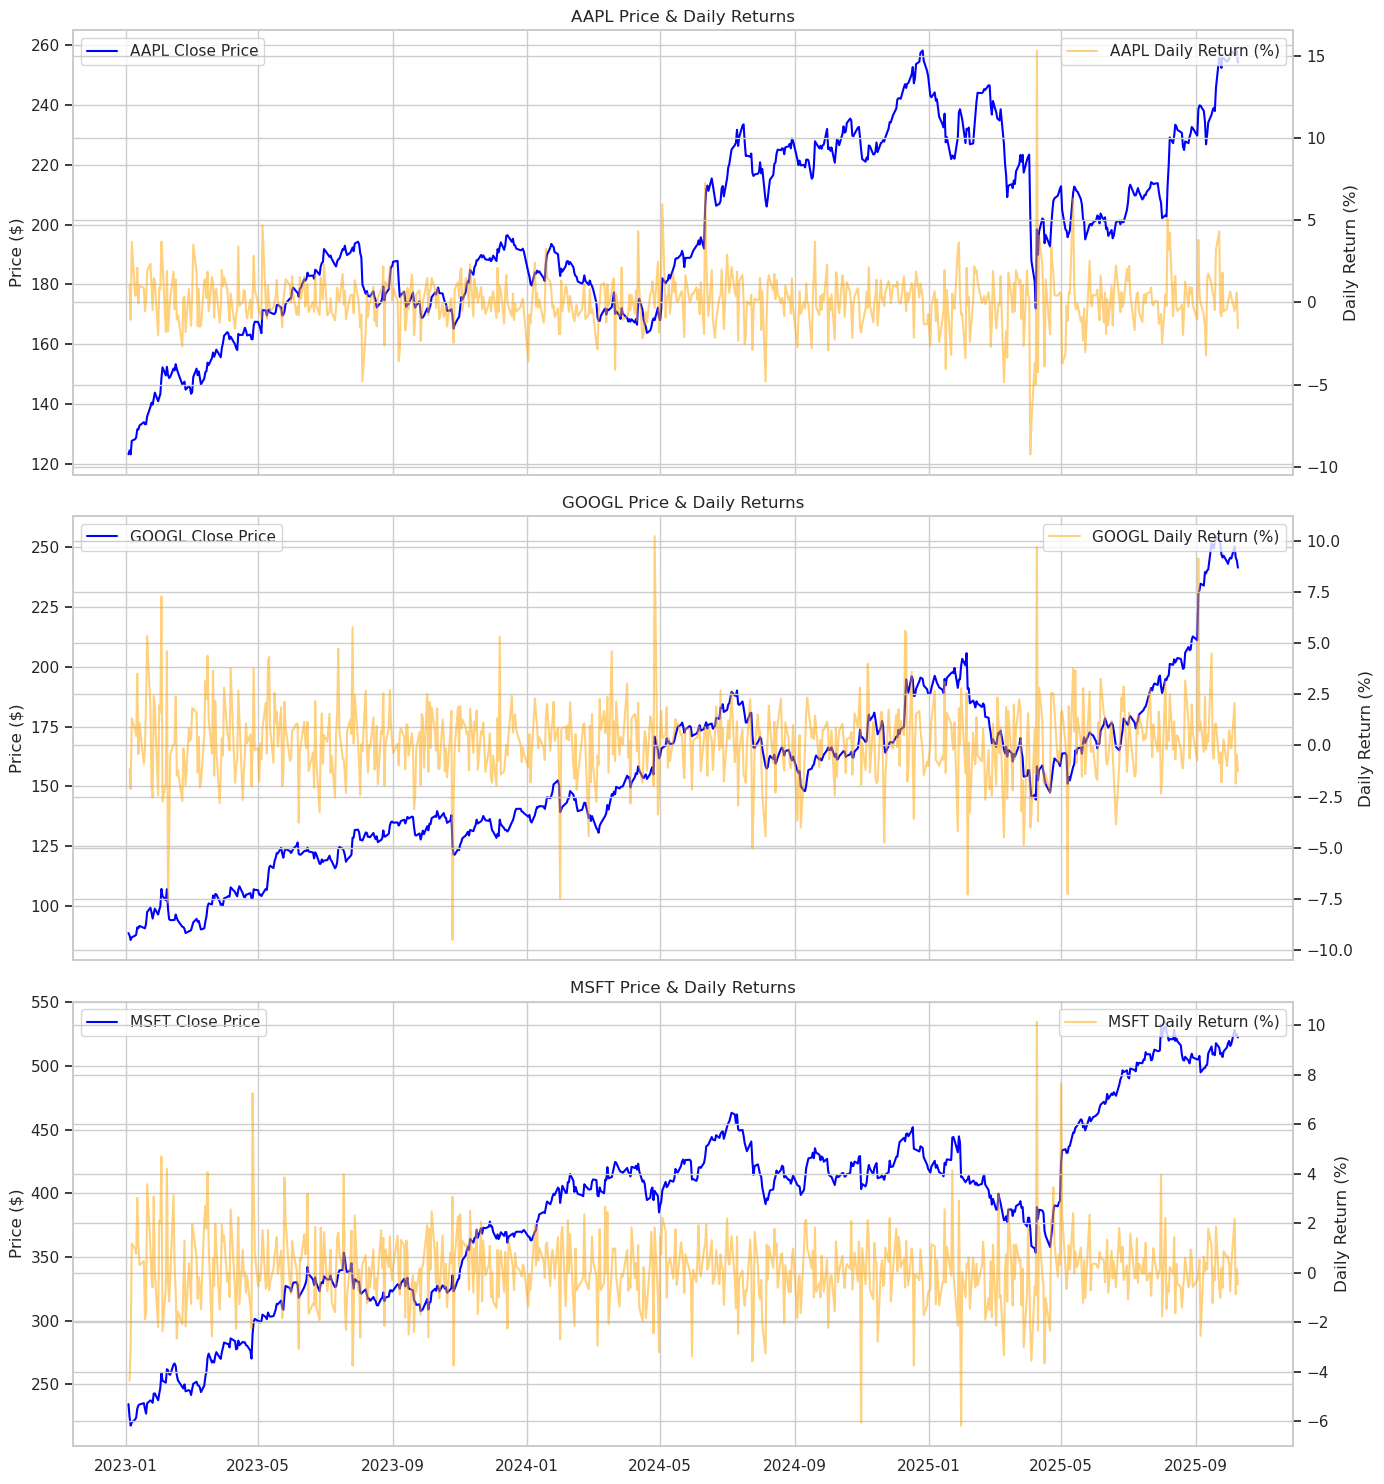

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily returns for each ticker
daily_returns = {}
for ticker in tickers:
    daily_returns[ticker] = data[ticker]['Close'].pct_change() * 100  # percentage

# Set style
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 5 * len(tickers)), sharex=True)

for i, ticker in enumerate(tickers):
    ax = axes[i]
    # Plot Close price
    ax.plot(data[ticker].index, data[ticker]['Close'], label=f"{ticker} Close Price", color='blue')
    
    # Overlay daily returns
    ax2 = ax.twinx()
    ax2.plot(data[ticker].index, daily_returns[ticker], label=f"{ticker} Daily Return (%)", color='orange', alpha=0.5)
    
    # Titles and labels
    ax.set_title(f"{ticker} Price & Daily Returns")
    ax.set_ylabel("Price ($)")
    ax2.set_ylabel("Daily Return (%)")
    
    # Legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.xlabel("Date")
plt.tight_layout()
plt.show()


# SECTION 4: VOLATILITY ANALYSIS

In [14]:
import os

# Ensure the directory exists
output_dir = "reports/figures"
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(output_dir, "volatility_analysis.png"), dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x600 with 0 Axes>


VOLATILITY ANALYSIS


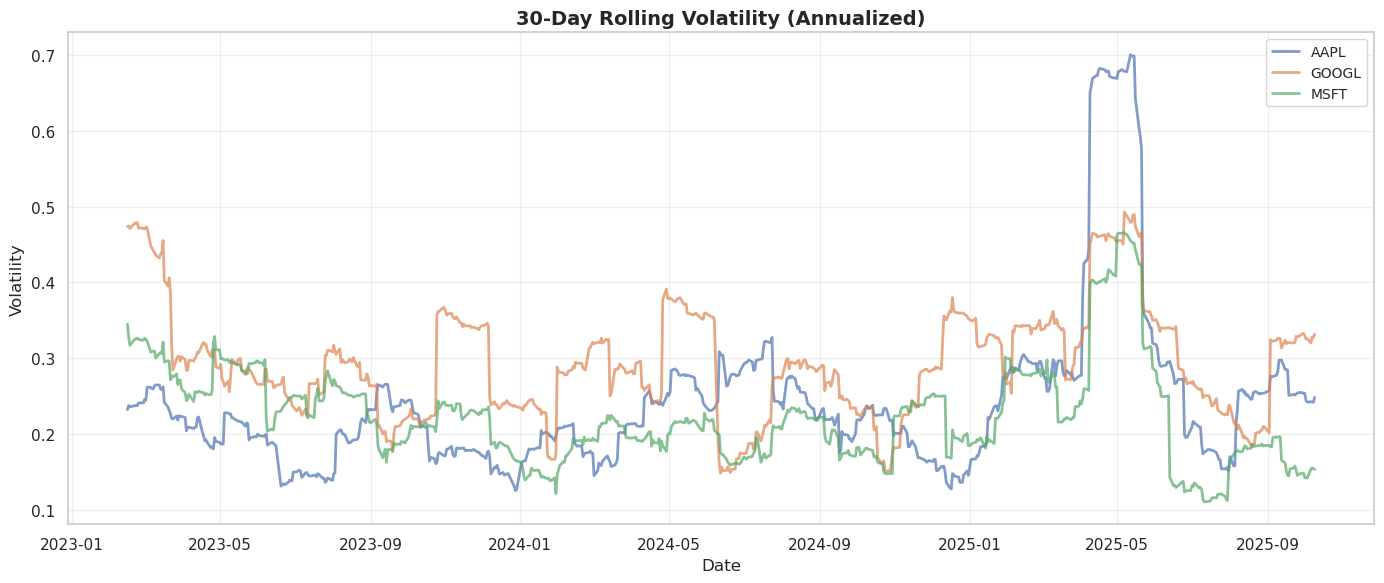


Volatility Statistics (Last 30 days):
AAPL: 0.2631
GOOGL: 0.3131
MSFT: 0.1642


In [15]:
print("\n" + "="*70)
print("VOLATILITY ANALYSIS")
print("="*70)

# Calculate rolling volatility (30-day standard deviation of returns)
volatility_df = pd.DataFrame()

for ticker in tickers:
    returns = data[ticker]['Close'].pct_change()
    volatility = returns.rolling(window=30).std() * np.sqrt(252)  # Annualized
    volatility_df[ticker] = volatility

# Plot volatility
fig, ax = plt.subplots(figsize=(14, 6))

for ticker in tickers:
    ax.plot(volatility_df.index, volatility_df[ticker], label=ticker, linewidth=2, alpha=0.7)

ax.set_title('30-Day Rolling Volatility (Annualized)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volatility', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print volatility statistics
print("\nVolatility Statistics (Last 30 days):")
recent_volatility = volatility_df.tail(30).mean()
for ticker in tickers:
    print(f"{ticker}: {recent_volatility[ticker]:.4f}")


# SECTION 5: KEY INSIGHTS

In [18]:
# Create a DataFrame with just Close prices for all tickers
close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})

# Calculate correlation matrix
correlation_matrix = close_prices.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           AAPL     GOOGL      MSFT
AAPL   1.000000  0.857681  0.777054
GOOGL  0.857681  1.000000  0.912425
MSFT   0.777054  0.912425  1.000000


In [19]:
print("\n" + "="*70)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("="*70)

insights = []

# 1. Best performing stock
best_performer = stats_df.loc[stats_df['Total_Return (%)'].idxmax()]
insights.append(f"1. Best Performer: {best_performer['Ticker']} with {best_performer['Total_Return (%)']:.2f}% return")

# 2. Most volatile stock
most_volatile = recent_volatility.idxmax()
insights.append(f"2. Most Volatile: {most_volatile} with volatility of {recent_volatility[most_volatile]:.4f}")

# 3. Highest correlation pair
corr_values = []
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        corr_values.append((tickers[i], tickers[j], correlation_matrix.iloc[i, j]))
highest_corr = max(corr_values, key=lambda x: x[2])
insights.append(f"3. Highest Correlation: {highest_corr[0]}-{highest_corr[1]} with {highest_corr[2]:.3f}")

# 4. Data quality
total_missing = sum([data[ticker].isnull().sum().sum() for ticker in tickers])
insights.append(f"4. Data Quality: {total_missing} missing values across all stocks")

# 5. Trading days
insights.append(f"5. Total Trading Days: {len(data)} days over ~{(pd.to_datetime(end_date) - pd.to_datetime(start_date)).days} calendar days")

for insight in insights:
    print(f"\n{insight}")

print("\n" + "="*70)
print("✓ Data exploration complete!")
print("✓ All visualizations saved to reports/figures/")
print("="*70)



KEY INSIGHTS FROM DATA EXPLORATION

1. Best Performer: GOOGL with 172.89% return

2. Most Volatile: GOOGL with volatility of 0.3131

3. Highest Correlation: GOOGL-MSFT with 0.912

4. Data Quality: 0 missing values across all stocks

5. Total Trading Days: 695 days over ~1735 calendar days

✓ Data exploration complete!
✓ All visualizations saved to reports/figures/


# SECTION 6: SAVE PROCESSED DATA

In [21]:
import os

# Ensure the directory exists
output_dir = "data/processed"
os.makedirs(output_dir, exist_ok=True)

# Save the data
data.to_csv(os.path.join(output_dir, "stock_data_processed.csv"))
stats_df.to_csv(os.path.join(output_dir, "stock_statistics.csv"), index=False)
correlation_matrix.to_csv(os.path.join(output_dir, "correlation_matrix.csv"))

print("✓ Data saved successfully!")

✓ Data saved successfully!
